# SE 3210 Assignment 3

# (1) Randomly sample 100 images for each class (total 1000 images) from the MNIST training data set. 

In [0]:
import sys
import sklearn
import matplotlib
import numpy as np

print('Python: {}'.format(sys.version))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('NumPy: {}'.format(np.__version__))

Python: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
Sklearn: 0.22.2.post1
Matplotlib: 3.2.1
NumPy: 1.18.4


In [0]:
from keras.datasets import mnist
import random

(x_train, y_train), (x_test, y_test) = mnist.load_data()

def samples(x,y):
  temp = []
  data = []
  label = []
  for i in range(len(y)):
    temp.append([x[i],y[i]])
  random.shuffle(temp)
  for i in range(10):
    k = 0
    for j in range(len(temp)):
      if k >= 100:
        break
      if temp[j][1] == i:
        data.append(temp[j][0])
        label.append(temp[j][1])
        k += 1
  return np.array(data), np.array(label)
x_train, y_train = samples(x_train, y_train)
print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (1000, 28, 28)
Training Labels: (1000,)


In [0]:
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


In [0]:
import matplotlib.pyplot as plt

# python magic function
%matplotlib inline

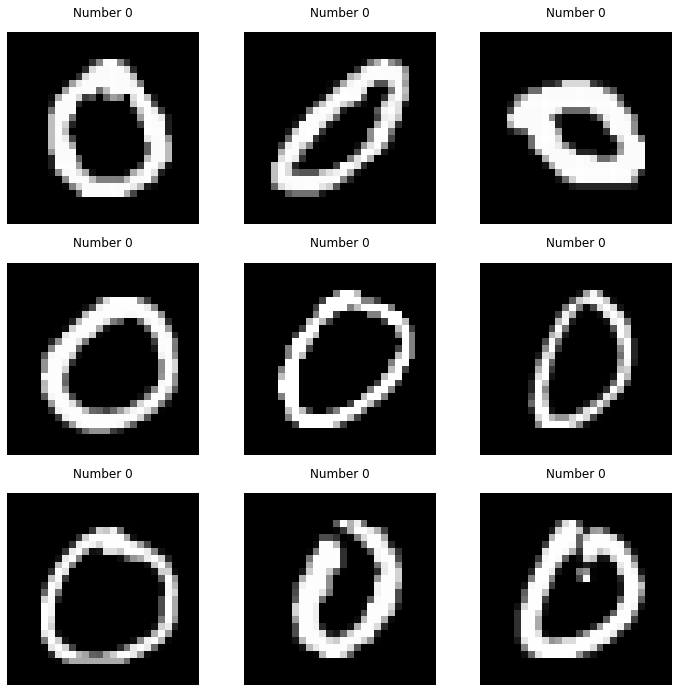

In [0]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# display the figure
fig.show()

## (2) For 1000 images, perform k-means clustering and compute the cost. (i.e., k = 10)

In [0]:
# preprocessing the images
# convert each image to 1 dimensional array
X = x_train.reshape(len(x_train),-1)
Y = y_train
# normalize the data to 0 - 1
X = X.astype(float) / 255.
print(X.shape)
print(X[0].shape)

(1000, 784)
(784,)


In [0]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

10


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [0]:
MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [0]:
kmeans.labels_

array([2, 5, 7, 2, 2, 2, 8, 2, 2, 5, 2, 2, 3, 5, 2, 2, 5, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 8, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 8, 1, 2, 2, 2, 2, 2,
       2, 2, 5, 5, 7, 5, 2, 5, 1, 8, 2, 2, 2, 2, 3, 2, 1, 2, 8, 2, 2, 5,
       2, 8, 2, 2, 5, 2, 1, 5, 2, 2, 2, 5, 5, 5, 2, 2, 2, 2, 5, 2, 2, 1,
       5, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4,
       0, 4, 0, 4, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 4, 4, 4, 4,
       0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 0, 4, 0, 4,
       0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0,
       0, 0, 3, 1, 6, 6, 4, 5, 0, 5, 0, 4, 5, 5, 6, 5, 0, 9, 9, 9, 6, 0,
       4, 6, 0, 5, 5, 0, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6,
       0, 8, 0, 5, 9, 2, 6, 6, 6, 6, 4, 9, 5, 6, 0, 5, 6, 6, 6, 8, 6, 8,
       6, 6, 0, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 3, 3, 0, 3, 6, 0, 3, 6, 5,
       6, 6, 0, 0, 1, 0, 0, 6, 6, 0, 6, 0, 0, 6, 0,

In [0]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        print(labels)
        print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9],
      dtype=uint8)]
Cluster: 0, label: 1
[array([0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9], dtype=uint8)]
Cluster: 1, label: 3
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# (3) Repeat (2) multiple times with diﬀerent initialization and ﬁnd the model that achieves the lowest cost.

In [0]:
from sklearn import metrics
def calculate_metrics(estimator, data, labels):
    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [0]:
clusters = [10, 16, 36, 64]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # print cluster metrics
    calculate_metrics(estimator, X, Y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 39827.67243278705
Homogeneity: 0.41459060209459336
[array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9], dtype=uint8)]
Cluster: 0, label: 8
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8], dtype=uint8)]
Cluster: 1, label: 3
[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

# (4) Based on the clustering model, classify the MNIST test data set. ( i.e., ﬁnd the closest center among 10 centers ) Provide accuracy. Explain your ﬁndings.

In [0]:
# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 150)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

# predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

[array([8, 8], dtype=uint8)]
Cluster: 0, label: 8
[array([3, 3, 3, 3, 3, 3, 3, 3, 8], dtype=uint8)]
Cluster: 1, label: 3
[array([2, 3, 7, 8], dtype=uint8)]
Cluster: 2, label: 2
[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       3, 5, 9], dtype=uint8)]
Cluster: 3, label: 1
[array([2, 3, 4, 4, 4, 4, 4, 6, 6, 7, 9, 9], dtype=uint8)]
Cluster: 4, label: 4
[array([0, 0, 0, 0, 6], dtype=uint8)]
Cluster: 5, label: 0
[array([4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 9], dtype=uint8)]
Cluster: 6, label: 4
[array([4, 5, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9], dtype=uint8)]
Cluster: 7, label: 7
[array([8], dtype=uint8)]
Cluster: 8, label: 8
[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 5, 7, 7, 7, 8, 8, 8, 8, 8, 8], dtype=uint8)]
Cluster: 9, label: 1
[array([0, 0], dtype=uint8)]
Cluster: 10, label: 0
[array([0], dtype=uint8)]
Cluster: 11, label: 0
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 6], dtype=uint8)]
Cluster: 12, 

# Conclusion
```
Cluster의 개수에 따라 Model의 성능이 
다르게 나온다는 것을 알 수 있었다. 
대체적으로 Cluster의 수가 많을수록 
Accuracy는 높아졌고 이는 비슷한 이미지의 
Classify에 대해서 조금더 많은 Test를
할 수 있기 때문이라고 결론 내렸다.
1000개의 Data가 Model의 성능을 단정할 수
있을만큼 많은 양은 아니기 때문에 Sample의
개수를 늘려서 Accuracy를 새로 구하는 것이 
향후 필요할 것이다.
